In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle

In [3]:
def plot_saves(file, header):
    plt.xlabel('No. of Generations')
    plt.ylabel('Accuracy')
    plt.title(header)
    plt.figure(figsize=(15, 9))
    
    x = range(1, 101)
    for run in file:
        y = run[1]
        plt.plot(x, y)

    plt.show()

In [4]:
def compare_saves(files, legends):
    plt.figure(figsize=(15, 9))
    plt.xlabel('No. of Generations')
    plt.ylabel('Accuracy')
    
    x = range(1, 101)

    for f in files:
        avg_of_runs = np.array(f[0][1])
        for i in f[1:]:
            avg_of_runs += i[1]
        avg_of_runs = avg_of_runs / len(f) 

        plt.plot(x, avg_of_runs)
        
    plt.legend(legends)
    plt.show()

In [5]:
ga_path = 'pickles/ga/30runs/'
kbga_path = 'pickles/kbga/30runs/'
kb_path = "pickles/kb/"
de_path = 'pickles/de/'
kbde_path = 'pickles/kbde/'

In [6]:
ga_files = ['30_run_az_ga_ts_pt.pkl',
            '30_run_imdb_ga_ts_pt.pkl',
            '30_run_yelp_ga_ts_pt.pkl',
            '30_run_az_ga_ts.pkl',
            '30_run_imdb_ga_ts.pkl',
            '30_run_yelp_ga_ts.pkl'
            ]

In [7]:
kb_files = ['30_run_az_kbip_ts_pt.pkl',
            '30_run_az_kbps_ts_pt.pkl',
            '30_run_az_kbco_ts_pt.pkl',
            '30_run_az_kbmu_ts_pt.pkl',
            ]

In [8]:
kbga_files = [
            '30_run_az_kbga_vp_ts.pkl',
            '30_run_az_kbga_es50_100_ts.pkl',
            '30_run_imdb_kbga_vp_ts.pkl',
            '30_run_imdb_kbga_es50_100_ts.pkl',
            '30_run_yelp_kbga_vp_ts.pkl',
            '30_run_yelp_kbga_es50_100_ts.pkl',
            ]

In [9]:
de_files = [
            '30_run_az_de.pkl',
            'n_run_az_de_crt.pkl',
            'n_run_az_de_crt1.pkl',
            ]

In [10]:
kbde_files = [
            '30_run_az_kbde.pkl',
            'n_run_az_kbde_crt.pkl',
            'n_run_az_kbde_crt1.pkl',
            ]

## Comparison

In [23]:
rf = open(de_path+de_files[0], 'rb')
de_30 = pickle.load(rf)

rf = open(de_path+de_files[1], 'rb')
de_5 = pickle.load(rf)

rf = open(ga_path+ga_files[0], 'rb')
ga_30 = pickle.load(rf)

rf = open(kbga_path+kbga_files[0], 'rb')
kbga_30 = pickle.load(rf)

rf = open(kbde_path+kbde_files[0], 'rb')
kbde_30 = pickle.load(rf)

rf = open(kbde_path+kbde_files[1], 'rb')
kbde_5 = pickle.load(rf)

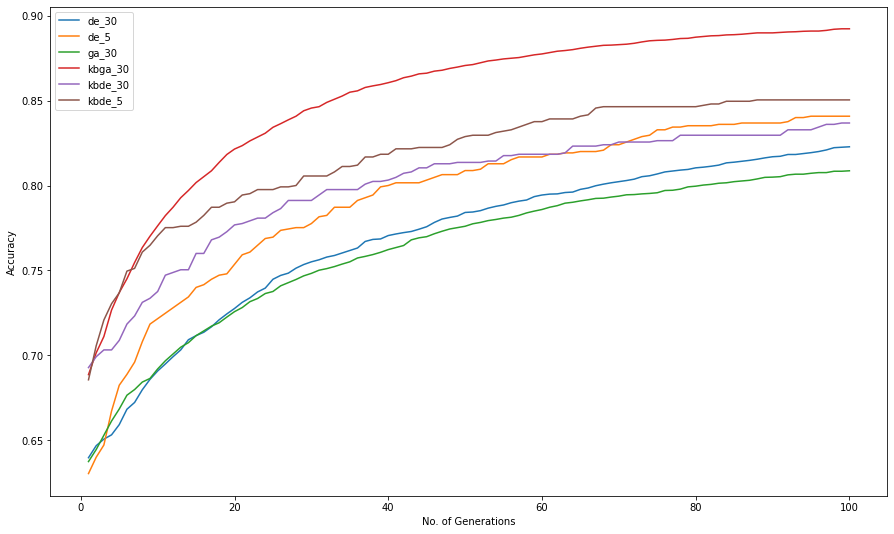

In [61]:
legends = [
    "de_30", "de_5",
    "ga_30", "kbga_30", 
    "kbde_30", "kbde_5"
    ]

compare_saves(
    [de_30, de_5,
     ga_30, kbga_30, 
     kbde_30, kbde_5,], 
     legends
     )

In [41]:
rf = open(ga_path+ga_files[0], 'rb')
ga_az_pt = pickle.load(rf)

rf = open(ga_path+ga_files[1], 'rb')
ga_imdb_pt = pickle.load(rf)

rf = open(ga_path+ga_files[2], 'rb')
ga_yelp_pt = pickle.load(rf)

rf = open(ga_path+ga_files[3], 'rb')
ga_az = pickle.load(rf)

rf = open(ga_path+ga_files[4], 'rb')
ga_imdb = pickle.load(rf)

rf = open(ga_path+ga_files[5], 'rb')
ga_yelp = pickle.load(rf)

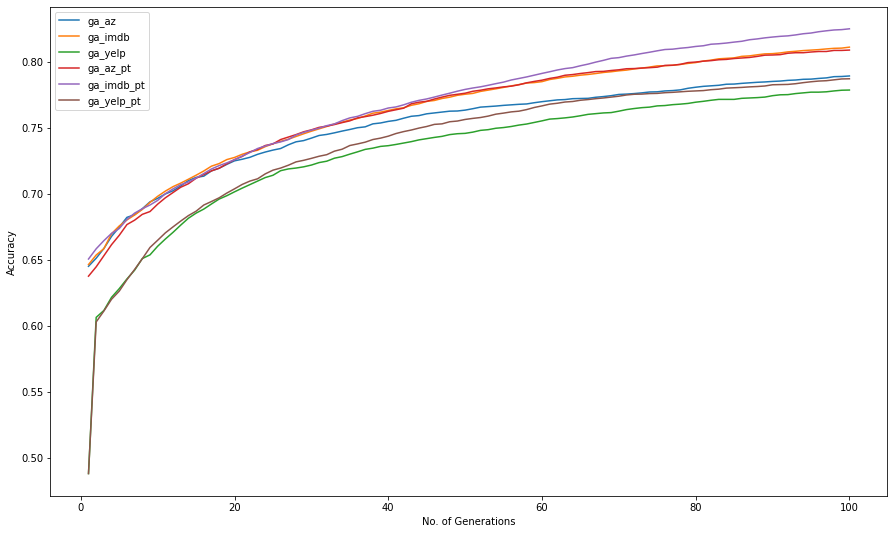

In [60]:
legends = [
    "ga_az", "ga_imdb",
    "ga_yelp", "ga_az_pt", 
    "ga_imdb_pt", "ga_yelp_pt"
    ]

compare_saves(
    [ga_az, ga_imdb,
     ga_yelp, ga_az_pt, 
     ga_imdb_pt, ga_yelp_pt,], 
     legends
     )

In [11]:
rf = open(ga_path+ga_files[0], 'rb')
ga_az_pt = pickle.load(rf)

rf = open(kb_path+kb_files[0], 'rb')
kbi = pickle.load(rf)

rf = open(kb_path+kb_files[1], 'rb')
kbs = pickle.load(rf)

rf = open(kb_path+kb_files[2], 'rb')
kbc = pickle.load(rf)

rf = open(kb_path+kb_files[3], 'rb')
kbm = pickle.load(rf)

rf = open(kbga_path+kbga_files[1], 'rb')
kbga_es50 = pickle.load(rf)

rf = open(kbga_path+kbga_files[0], 'rb')
kbga_vp = pickle.load(rf)

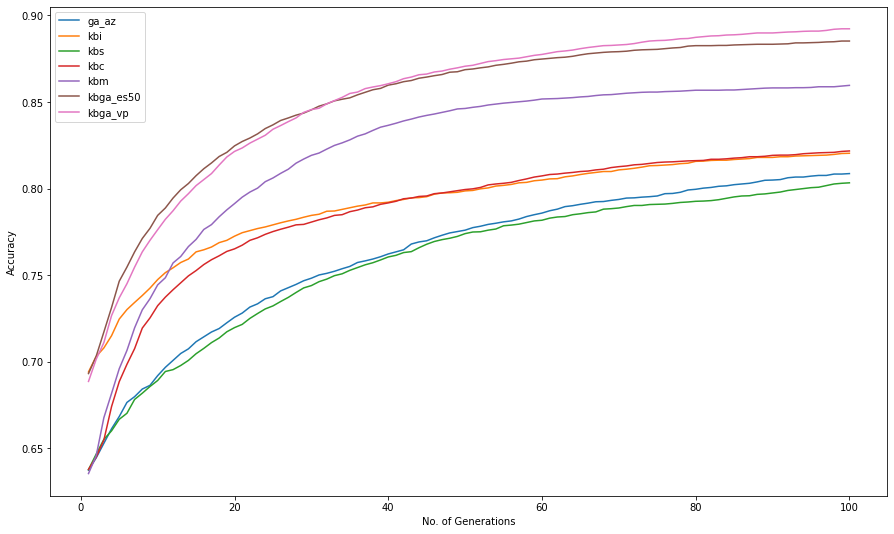

In [13]:
legends = [
    "ga_az", "kbi",
    "kbs", "kbc", 
    "kbm", "kbga_es50",
    "kbga_vp"
    ]

compare_saves(
    [ga_az_pt, kbi,
     kbs, kbc, 
     kbm, kbga_es50,
     kbga_vp], 
     legends
     )

In [17]:
kbga_vp[0][2]

[61,
 84,
 85,
 85,
 82,
 90,
 89,
 92,
 89,
 93,
 95,
 93,
 95,
 95,
 95,
 91,
 92,
 91,
 93,
 92,
 96,
 98,
 97,
 97,
 95,
 95,
 94,
 98,
 96,
 95,
 96,
 94,
 93,
 88,
 94,
 92,
 97,
 98,
 96,
 96,
 97,
 97,
 97,
 95,
 96,
 97,
 98,
 94,
 94,
 98,
 100,
 97,
 96,
 99,
 99,
 99,
 98,
 100,
 98,
 93,
 99,
 99,
 100,
 100,
 99,
 98,
 100,
 96,
 100,
 99,
 99,
 99,
 99,
 99,
 98,
 98,
 98,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 99,
 99,
 100,
 100,
 98,
 99,
 100,
 100,
 99,
 99,
 100,
 100,
 100,
 100,
 100]